# 第四次数学实验

## 问题一：计算下列线性规划问题的解

### （1）
**最大化目标函数：** 
$$ z = 400x_1 + 1000x_2 + 300x_3 - 200x_4 $$

**约束条件**：

$$
\begin{cases}
-2x_2 + x_3 + x_4 = 0 \\
2x_1 + 3x_2 \leq 16 \\
3x_1 + 4x_2 \leq 24 \\
0 \leq x_3 \leq 5 \\
x_1, x_2, x_4 \geq 0
\end{cases}
$$

In [1]:
# 求解（1）

from scipy.optimize import linprog

c1 = [-400, -1000, -300, 200] # 最大化问题，所以是负的
A_eq1 = [[0, -2, 1, 1]]
b_eq1 = [0]
A_ub1 = [
    [2, 3, 0, 0],
    [3, 4, 0, 0]
]
b_ub1 = [16, 24]
bounds1 = [(0, None), (0, None), (0, 5), (0, None)]

res1 = linprog(c1, A_eq=A_eq1, b_eq=b_eq1, A_ub=A_ub1, b_ub=b_ub1, bounds=bounds1, method='highs')

print(res1)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -5700.0
              x: [ 4.250e+00  2.500e+00  5.000e+00  0.000e+00]
            nit: 3
          lower:  residual: [ 4.250e+00  2.500e+00  5.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf  0.000e+00        inf]
                 marginals: [ 0.000e+00  0.000e+00 -5.000e+02  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 2.000e+02]
        ineqlin:  residual: [ 0.000e+00  1.250e+00]
                 marginals: [-2.000e+02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


### （1）的最优解

$$
\begin{cases}
x_1 = 4.25 \\
x_2 = 2.5 \\
x_3 = 5 \\
x_4 = 0
\end{cases}
$$

最大化的目标函数 $ z = 400x_1 + 1000x_2 + 300x_3 - 200x_4 $ 的最大值为 $ z = 5700 $。

### （2）
**最小化目标函数：**
$$ z = 3x_1 + 2x_2 - x_3 $$

**约束条件**：

$$
\begin{cases}
2x_1 + x_2 + 3x_3 \leq 5 \\
4x_1 + 3x_2 + x_3 \leq 5 \\
-x_1 + x_2 + x_3 \leq 2 \\
x_1, x_2, x_3 \geq 0
\end{cases}
$$

In [2]:
# 求解（2）
c2 = [3, 2, -1]
A_ub2 = [
    [2, 1, 3],
    [4, 3, 1],
    [-1, 1, 1]
]
b_ub2 = [5, 5, 2]
bounds2 = [(0, None), (0, None), (0, None)]

res2 = linprog(c2, A_ub=A_ub2, b_ub=b_ub2, bounds=bounds2, method='highs')

print(res2)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1.6666666666666667
              x: [ 0.000e+00  0.000e+00  1.667e+00]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  1.667e+00]
                 marginals: [ 3.667e+00  2.333e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.333e+00  3.333e-01]
                 marginals: [-3.333e-01 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


### （2）的最优解

$$
\begin{cases}
x_1 = 0 \\
x_2 = 0 \\
x_3 = 1.667
\end{cases}
$$

最小化的目标函数 $ z = 3x_1 + 2x_2 - x_3 $ 的值为 $ z = -1.6667 $。

## 问题二：运输问题

### 问题重述：

给出一路线图，从城市C1和C2分别有两批货物途径C3和C4最终到达C5、C6和C7。其中C1和C2分别有 $600$ 和 $500$ 的货物需要运出, C5、C6和C7的货物需求分别是 $450$、$350$ 和 $300$

问：
1. 如何进行运输安排使整个的运输费用最少？试建立问题的数学模型并求出最优解。
2. 进一步，如果从C3和C4到达C5、C6和C7这一阶段的运费均上涨 $50\%$，其他因素不变，试研究运输方案是否保持不变。

### （1）

#### 决策变量：

- $x_{ij}$ 表示从城市 $i$ 到城市 $j$ 的运输量，其中 $i \in \{C1, C2\}$ 且 $j \in \{C3, C4\}$。
- $y_{jk}$ 表示从城市 $j$ 到城市 $k$ 的运输量，其中 $j \in \{C3, C4\}$ 且 $k \in \{C5, C6, C7\}$。

#### 目标函数：
**最小化总运输成本：**

$$
\begin{align*}
\text{Cost} = &\, 4x_{C1C3} + 5x_{C2C3} + 7x_{C1C4} + 7x_{C2C4} \\
             &+ 3y_{C3C5} + 2y_{C3C6} + 2y_{C3C7} \\
             &+ y_{C4C5} + 3y_{C4C6} + 4y_{C4C7}
\end{align*}
$$

#### 约束条件：

- 供应量约束：

$$
\begin{cases}
x_{C1C3} + x_{C1C4} = 600 \\
x_{C2C3} + x_{C2C4} = 500
\end{cases}
$$  
  
- 需求量约束：

$$
\begin{cases}
y_{C3C5} + y_{C4C5} = 450 \\
y_{C3C6} + y_{C4C6} = 350 \\
y_{C3C7} + y_{C4C7} = 300
\end{cases}
$$  

- 中转平衡约束：

$$
\begin{cases}
x_{C1C3} + x_{C2C3} = y_{C3C5} + y_{C3C6} + y_{C3C7} \\
x_{C1C4} + x_{C2C4} = y_{C4C5} + y_{C4C6} + y_{C4C7}
\end{cases}
$$  

- 所有的决策变量都必须是非负的。



In [3]:
from scipy.optimize import linprog

# 定义函数系数
c = [4, 5, 7, 7, 3, 2, 2, 1, 3, 4]

# 定义约束条件左侧值
A = [
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # C1 供应
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # C2 供应
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],  # C5 需求
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # C6 需求
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],  # C7 需求
    [-1, -1, 0, 0, 1, 1, 1, 0, 0, 0],  # C3 中转平衡
    [0, 0, -1, -1, 0, 0, 0, 1, 1, 1]   # C4 中转平衡
]

# 定义约束条件的右侧值
b = [600, 500, 450, 350, 300, 0, 0]

# 定义变量的取值范围
x_bounds = (0, None)
bounds = [x_bounds] * len(c)

# 求解
result = linprog(c, A_eq=A, b_eq=b, bounds=bounds, method='highs')

print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 7550.0
              x: [ 6.000e+02  5.000e+02  0.000e+00  0.000e+00  4.500e+02
                   3.500e+02  3.000e+02 -0.000e+00  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 6.000e+02  5.000e+02  0.000e+00  0.000e+00
                              4.500e+02  3.500e+02  3.000e+02 -0.000e+00
                              0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              3.000e+00  4.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                     

### （1）的结果分析

根据线性规划模型的求解结果，最优的运输安排如下：

- 从C1到C3运输 $600$ 单位货物。
- 从C2到C3运输 $500$ 单位货物。
- 从C3到C5运输 $450$ 单位货物。
- 从C3到C6运输 $350$ 单位货物。
- 从C3到C7运输 $300$ 单位货物。
- C1和C2不需要向C4运输任何货物。
- C4不需要向C5、C6、C7运输任何货物。

这样的运输计划将导致的总运输成本是 $\$7550$，最优。

### （2）

现在我们考虑当C3和C4到C5、C6和C7的运输费用上涨 $50\%$ 时的情况。

上涨后的新单价为：

- C3到C5：$\$4.5$
- C3到C6：$\$3$
- C3到C7：$\$3$
- C4到C5：$\$1.5$
- C4到C6：$\$4.5$
- C4到C7：$\$6$

下面我们只需调整(1)中代码的`Cost`系数即可

In [4]:
c_new = [4, 5, 7, 7, 4.5, 3, 3, 1.5, 4.5, 6]

result_new = linprog(c_new, A_eq=A, b_eq=b, bounds=bounds, method='highs')

print(result_new)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 8425.0
              x: [ 6.000e+02  5.000e+01  0.000e+00  4.500e+02  0.000e+00
                   3.500e+02  3.000e+02  4.500e+02  0.000e+00  0.000e+00]
            nit: 1
          lower:  residual: [ 6.000e+02  5.000e+01  0.000e+00  4.500e+02
                              0.000e+00  3.500e+02  3.000e+02  4.500e+02
                              0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00
                              1.000e+00  0.000e+00  0.000e+00  0.000e+00
                              3.500e+00  5.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                     

### （2）的结果分析

在运费上涨 $50\%$ 后，最优的运输方案有所变化：

- 从C1到C3运输 $600$ 单位货物。
- 从C2到C3运输 $50$ 单位货物。
- 从C2到C4运输 $450$ 单位货物。
- 从C3到C6运输 $350$ 单位货物。
- 从C3到C7运输 $300$ 单位货物。
- 从C4到C5运输 $450$ 单位货物。
- C1不需要向C4运输任何货物，C3不需要向C5运输任何货物，C4不需要向C6和C7运输任何货物。

这个方案的总运输成本为 $\$8425$，最优。

## 问题三：求解下列非线性规划问题

**最大化目标函数：**
$$ f(x_1, x_2, x_3) = x_1^2 - 2x_1x_2 + 2x_2^2 - 4x_1 - 12x_2 + x_3^3 $$

**受以下约束：**

$$
\begin{cases}
x_1 + x_2 + 2x_3 = 2 \\
2x_1 - 2x_2 + x_3 \geq 5 \\
2x_1^2 + x_2 \leq 3x_3 + 2 \\
2x_1^2 + 5x_2^2 + 8x_3^2 = 4 \\
x_1 \leq 8, x_2 \leq 4, x_3 \leq 1
\end{cases}
$$

> tips: 我们可以使用Python的`scipy.optimize.minimize`函数求解这个非线性目标和约束问题。此外由于`minimize`函数是默认求得最小值，故需要通过最小化目标函数的相反数来找到最大值。

In [5]:
from scipy.optimize import minimize, differential_evolution
import numpy as np

def objective(x):
    return -(x[0]**2 - 2*x[0]*x[1] + 2*x[1]**2 - 4*x[0] - 12*x[1] + x[2]**3)

def constraint1(x):
    return x[0] + x[1] + 2*x[2] - 2 

def constraint2(x):
    return 2*x[0] - 2*x[1] + x[2] - 5

def constraint3(x):
    return 3*x[2] + 2 - 2*x[0]**2 - x[1]

def constraint4(x):
    return 2*x[0]**2 + 5*x[1]**2 + 8*x[2]**2 - 4

# 定义多个初始猜测值
initial_guesses = [
    np.array([8, 4, 1]),
    np.array([0, 0, 0]),
    np.array([4, 2, 1]),
    np.array([1, 1, 1])
]

bounds = [(-np.inf, 8), (-np.inf, 4), (-np.inf, 1)]

cons = [
    {'type': 'eq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
    {'type': 'eq', 'fun': constraint4}
]

best_result = None

# 对每个初始猜测值执行优化
for guess in initial_guesses:
    res = minimize(objective, guess, bounds=bounds, constraints=cons, method='SLSQP')
    if best_result is None or res.fun < best_result.fun:
        best_result = res

print(best_result)

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: -2.9282696711290876
       x: [ 1.436e+00 -4.197e-01  2.524e-01]
     nit: 49
     jac: [ 2.882e-01  1.655e+01 -1.912e-01]
    nfev: 324
    njev: 45


### 结果分析

因为`minimize`函数所求得的结果通常只是局部最优解，故为了寻得全局最优解，我们定义了**四个不同的初始猜测值**并对每一个初始猜测值分别执行优化过程，最终选择出目标函数值最优的情况。

通过运行代码，我们发现：
1. `success: False`：表明优化在题目所给的约束范围内**并没有**成功找到一个满意的解。
2. 我们当前情况下最终迭代达到的最优变量值是：
$$
\begin{cases}
x_1 = 1.436 \\
x_2 = -0.420 \\
x_3 = 0.252
\end{cases}
$$
3. 我们当前情况下最终迭代所达到的最优目标函数值为：$2.928$
4. 注意由于优化失败，所以这并不是最优解，这意味着该题**可行解为空**。

## 问题四：选址问题

### 问题重述
- 有 $20$ 栋住宅楼，每栋的坐标分别为 $(a_i, b_i)$，其中 $i = 1$ 到 $20$。
- 坐标数组 $a$ 和 $b$ 分别为：
  - $a = [29.74, 4.9, 69.32, 65.0, 98.3, 55.27, 40.0, 19.8, 62.5, 73.3, 37.58, 0.98, 41.98, 75.37, 79.38, 92.0, 84.47, 36.77, 62.08, 73.13]$
  - $b = [19.39, 90.48, 56.92, 63.18, 23.44, 54.88, 93.16, 33.5, 65.5, 39.19, 62.73, 69.9, 39.72, 41.37, 65.52, 83.75, 37.16, 42.52, 59.46, 56.58]$

### 1. 选定一个服务中心位置，使其到所有住宅总距离最短

注意：对于这个总距离，我们选择使用**欧几里得距离（L2范数）**而不是**曼哈顿距离（L1范数）**

我们是基于以下考虑：

- **直观性和实用性**：
   - 欧几里得距离是最直观的距离测量方式，符合我们对于“距离”直觉的理解。
   - 该题背景没有给出明确的道路或运输限制（即人们按道路直线行走或驾车），故欧几里得距离提供了一个合适的解决方案。

- **特殊性与适用性**：
   - 最短的直线距离往往是最重要的优化目标，它直接关联到服务效率和响应时间。

In [6]:
import numpy as np
from scipy.optimize import minimize

# 住宅坐标
a = np.array([29.74, 4.9, 69.32, 65.0, 98.3, 55.27, 40.0, 19.8, 62.5, 73.3, 37.58, 0.98, 41.98, 75.37, 79.38, 92.0, 84.47, 36.77, 62.08, 73.13])
b = np.array([19.39, 90.48, 56.92, 63.18, 23.44, 54.88, 93.16, 33.5, 65.5, 39.19, 62.73, 69.9, 39.72, 41.37, 65.52, 83.75, 37.16, 42.52, 59.46, 56.58])

def total_distance(center, a, b):
    distance = np.sqrt((a - center[0])**2 + (b - center[1])**2)
    return np.sum(distance)

initial_guess = [np.mean(a), np.mean(b)]

result = minimize(total_distance, initial_guess, args=(a, b), method='Nelder-Mead')

optimal_center = result.x
print("Optimal center location: ", optimal_center)
print("Minimum total distance: ", result.fun)

Optimal center location:  [61.24071593 56.97372053]
Minimum total distance:  573.1206003249832


>**answer:** 该服务中心坐标为 $(61.24,56.97)$，且最小距离之和为 $573.12$

### 2. 考虑服务频率的单一服务中心位置选定

我们选择通过计算**加权平均坐标**来实现，其中权重是每个住宅楼的服务频率。

In [7]:
# 服务频率
c = np.array([1, 1, 2, 4, 4, 2, 5, 1, 6, 1, 1, 1, 4, 2, 6, 2, 1, 2, 4, 5])

# 定义要最小化的函数（总欧几里得距离乘以服务频率）
def weighted_total_distance(center, a, b, c):
    distances = np.sqrt((a - center[0])**2 + (b - center[1])**2)
    return np.sum(distances * c)

# 使用优化方法寻找最佳服务中心位置，考虑服务频率
result_weighted = minimize(weighted_total_distance, initial_guess, args=(a, b, c))

# 最优服务中心位置，考虑权重
optimal_center_weighted = result_weighted.x

print("Optimal center location (weighted): ", optimal_center_weighted)
print("Minimum total distance (weighted): ", result_weighted.fun)

Optimal center location (weighted):  [64.25791805 60.48885285]
Minimum total distance (weighted):  1256.1334913948997


>**answer:** 重新计算得到的中心坐标为 $(64.26, 60.49)$，且最小加权距离之和为 $1256.13$

### 3. 综合考虑任务量与距离，选定一个主中心和两个分中心位置

**题意理解与阐述：**

基于实际情况的考量，该题需选定三个点（一个主中心和两个分中心），沿用（1）与（2）的条件，使得总的加权距离最小（保证中心能最快完成服务）。此外还有任务量的比例要求：主中心与两个分中心的任务比为 $2:1:1$。

**策略选择：**

1. **使用K-means聚类算法：** 使用深度学习算法，将 $20$ 个住宅根据地理位置和服务频率（作为权重）分为三组。通过调整聚类的初始化和迭代过程，确保主中心与分中心聚类后的任务比为 $2:1:1$。
2. **优化服务中心的位置：** 对于每个聚类生成的组，分别计算其服务中心位置，目标是最小化该组内所有住宅到服务中心的加权欧几里得距离总和。
3. **计算运输量：** 对每个服务中心，运输量为其服务的所有住宅的服务频率之和。

In [8]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

locations = np.column_stack((a, b))

initial_centers = np.array([np.mean(locations, axis=0),
                            locations[np.argmin(a)],
                            locations[np.argmax(a)]])

keans = KMeans(n_clusters=3, init=initial_centers, n_init=1).fit(locations, sample_weight=c)

labels = keans.labels_
centers = keans.cluster_centers_

cluster_weights = [np.sum(c[labels == i]) for i in range(3)]

print("Cluster centers: ", centers)
print("Cluster weights: ", cluster_weights)

Cluster centers:  [[65.51194444 67.12444444]
 [30.40545455 47.26545455]
 [87.71375    31.60625   ]]
Cluster weights:  [36, 11, 8]


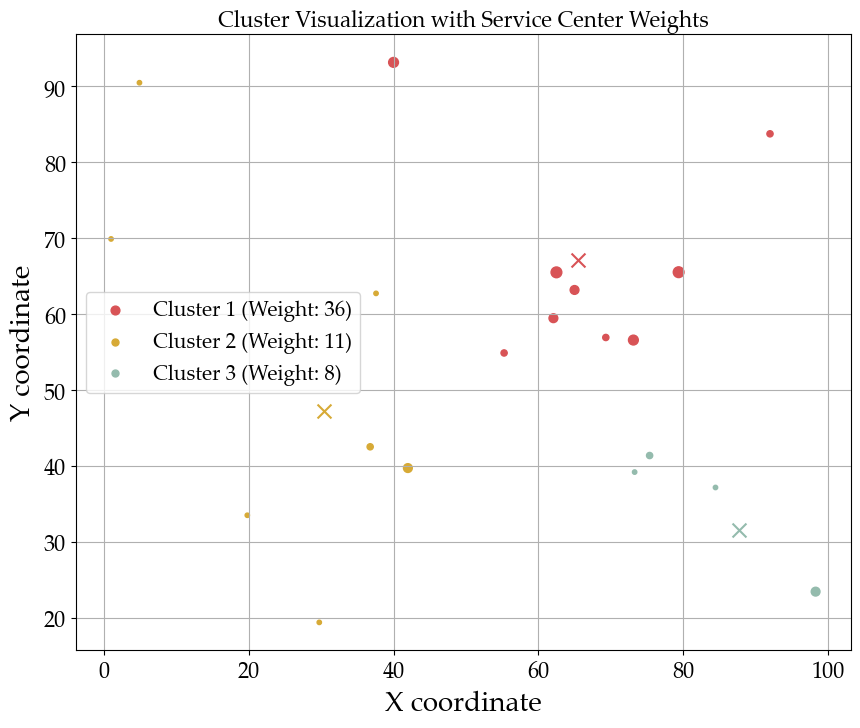

In [9]:
# 可视化聚类后的结果
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Palatino Linotype'

plt.figure(figsize=(10, 8))

colors = ['#D85356', '#D7AA36', '#94BBAD']
for i in range(3):
    plt.scatter(locations[labels == i, 0], locations[labels == i, 1], c=colors[i], label=f'Cluster {i+1} (Weight: {cluster_weights[i]})', s=c[labels == i]*10)  # 点的大小反映服务频率
    plt.scatter(centers[i, 0], centers[i, 1], c=colors[i], marker='x', s=100)  # 中心点

plt.title('Cluster Visualization with Service Center Weights', fontsize=16)
plt.xlabel('X coordinate', fontsize=20)
plt.ylabel('Y coordinate', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

### 结果分析：

**通过编程求解与可视化，我们发现：**

- 因为题目数据设置的局限性，很难兼顾**加权距离和最短**与**任务量之比**。
- 基于现实问题建模，首要考虑应该是**加权距离和最短**(最重要，保证中心能最快提供服务，实现最优化)。而**任务量之比**可以微调，使其尽可能接近 $2:1:1$。
- 使用优化后的**K-means聚类**算法后，我们得到了最符合要求的三个中心地址及其任务量，如下：
  - **Cluster 1(主中心)**: 坐标为 $(65.51, 67.12)$ ，任务量为 $36$。
  - **Cluster 2(分中心)**: 坐标为 $(30.40, 47.26)$ ，任务量为 $11$。
  - **Cluster 3(分中心)**: 坐标为 $(87.71, 31.61)$ ，任务量为 $8$。
- 通过可视化，我们能更直观感受到中心与住宅的位置分布。其中，`x` 表示中心，`o` 表示住宅，不同颜色表示不同的聚类结果（同一种颜色的住宅与中心为一类），`o` 的不同大小表示权重的不同。
- 在优先考虑**加权距离和最短**情况下，通过调整初始聚类点的选择，使任务量之比接近 $3:1:1$，尽可能满足题意。

## 问题五：调度问题

### 问题重述

- **服务时间**: 每天从上午 $9$ 点到下午 $5$ 点，共 $8$ 小时。

- **话务员需求**: 每小时所需的话务员数量不同，具体为：

  - $9-10: 10$人
  - $10-11: 12$人
  - $11-12: 14$人
  - $12-13: 16$人
  - $13-14: 18$人
  - $14-15: 17$人
  - $15-16: 15$人
  - $16-17: 10$人

- **全职雇员**:

  - 薪水: 每天 $120$ 美元
  - 工作时间: 上午 $9$ 点至下午 $5$ 点，中间休息一小时（一半在 $11$ 点休息，另一半在 $12$ 点休息）
  - 可用的全职雇员上限: $12$ 人
  - 需要至少一半以上的工作由全职雇员完成

- **临时雇员**:

  - 薪水: 每小时 $10$ 美元
  - 工作时长: 连续四小时，无休息时间
  - 临时雇员可被雇佣以覆盖任何时段

### 目标
计算出最少的总薪水开销，同时满足每小时的人员需求和全职雇员的工作要求。

### 决策变量

1. **全职雇员数量** $F$: 由于全职员工每天工作 $8$ 小时，每个小时的数量一致。
2. **临时雇员数量** $T_i$: 对于每个 $4$ 小时的时段定义临时员工的数量：
   - 9点到13点 $T_9$
   - 10点到14点 $T_{10}$
   - 11点到15点 $T_{11}$
   - 12点到16点 $T_{12}$
   - 13点到17点 $T_{13}$

### 目标函数

**最小化总薪水开销：**
$$ \text{Cost} = 120F + 40(T_9 + T_{10} + T_{11} + T_{12} + T_{13}) $$

### 约束条件

1. **人员需求满足**: 对于每个小时，全职员工和临时员工的总数需要满足特定需求。
   - 9点: $F + T_9 \ge 10$
   - 10点: $F + T_9 + T_{10} \ge 12$
   - 11点: $F + T_9 + T_{10} + T_{11} \ge 14$
   - 12点: $F + T_9 + T_{10} + T_{11} + T_{12} \ge 16$
   - 13点: $F + T_{10} + T_{11} + T_{12} + T_{13} \ge 18$
   - 14点: $F + T_{11} + T_{12} + T_{13} \ge 17$
   - 15点: $F + T_{12} + T_{13} \ge 15$
   - 16点: $F + T_{13} \ge 10$
   
2. **全职雇员上限**: 
   - $0 \le F \le 12$

3. **全职员工的至少一半以上工作要求**：由于全职员工应至少完成一半以上的工作，故我们可以选定在最繁忙的小时，全职员工至少完成一半以上工作。
   - $F \ge 18 / 2 = 9$
   
4. **临时雇员数量非负**: 
   - $T_9, T_{10}, T_{11}, T_{12}, T_{13} \ge 0$

In [10]:
from scipy.optimize import linprog

c = [120, 40, 40, 40, 40, 40]

A = [
    [-1, -1,  0,  0,  0,  0],  # 9:00 needs
    [-1, -1, -1,  0,  0,  0],  # 10:00 needs
    [-1, -1, -1, -1,  0,  0],  # 11:00 needs
    [-1, -1, -1, -1, -1,  0],  # 12:00 needs
    [-1,  0, -1, -1, -1, -1],  # 13:00 needs
    [-1,  0,  0, -1, -1, -1],  # 14:00 needs
    [-1,  0,  0,  0, -1, -1],  # 15:00 needs
    [-1,  0,  0,  0,  0, -1]   # 16:00 needs
]

b = [-10, -12, -14, -16, -18, -17, -15, -10]

x_bounds = (9, 12)
t_bounds = (0, None)

bounds = [x_bounds, t_bounds, t_bounds, t_bounds, t_bounds, t_bounds]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 1520.0
              x: [ 9.000e+00  1.000e+00  2.000e+00  2.000e+00  5.000e+00
                   1.000e+00]
            nit: 6
          lower:  residual: [ 0.000e+00  1.000e+00  2.000e+00  2.000e+00
                              5.000e+00  1.000e+00]
                 marginals: [ 4.000e+01  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          upper:  residual: [ 3.000e+00        inf        inf        inf
                                    inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  3.000e+00
                              1.000e+00  0.000e+00  0.000e+00  0.000e+00]
                 margin

### 结果分析

通过运行代码，求得如下人员的雇佣方案，在满足工作要求的前提下，使公司所支付的薪水总数最少。

#### 最优员工配置
- **全职雇员数量** $F$: $9$人
- **临时雇员数量** $T_i$:
   - 9点到13点 $T_9$: $1$人
   - 10点到14点 $T_{10}$: $2$人
   - 11点到15点 $T_{11}$: $2$人
   - 12点到16点 $T_{12}$: $5$人
   - 13点到17点 $T_{13}$: $1$人

#### 总薪水开销
- **总费用**: $\$1520$

## 问题六：曲线拟合问题

### 问题重述：
给定一系列实验数据点 $(0,0.844), (50,0.908), (100,0.751), (150,0.603), (200,0.506), (250,0.448), (300,0.414)$
需要确定函数 
$$Y=f(a_1,a_2,a_3,a_4,a_5,x)=a_1 + a_2 \cdot e^{-a_3 \cdot x} + a_4 \cdot e^{-a_5 \cdot x} $$
中参数 $a1, a2, a3, a4, a5$ 的最优值，使得该函数能够最好地拟合这些数据点。

### 解决策略：

我们选择**非线性最小二乘拟合**方法来估计参数。
但是在拟合过程中，由于随机设置猜测值容易导致算法不能正常收敛，我们做了如下改进：

1. 通过分析数据为参数提供了更合适的初值猜测。
2. 增加了函数调用的最大次数，以便算法有更多迭代求解的机会。
3. 归一化 $x$ 数据以改善问题的条件，以提高算法的稳定性和收敛速度。

In [11]:
import numpy as np
from scipy.optimize import curve_fit

# 给定的数据点
x_data = np.array([0, 50, 100, 150, 200, 250, 300])
y_data = np.array([0.844, 0.908, 0.751, 0.603, 0.506, 0.448, 0.414])

# 定义拟合函数
def fitting_function(x, a1, a2, a3, a4, a5):
    return a1 + a2 * np.exp(-a3 * x) + a4 * np.exp(-a5 * x)

# 我们使用最后一个 y 值作为 a1 的初始猜测。
a1_initial = y_data[-1]

# 对于 a2 和 a4，我们使用第一个 y 值减去最后一个 y 值。
a2_initial = a4_initial = (y_data[0] - y_data[-1]) / 2

# a3 和 a5 是衰减率参数，我们初始猜测使用较小的值。
a3_initial = a5_initial = 0.001  # 较小的初始值，以避免溢出

initial_guess = [a1_initial, a2_initial, a3_initial, a4_initial, a5_initial]

# 对 x 数据进行归一化
x_data_normalized = x_data / max(x_data)

# 使用合理确定的初始猜测值和归一化后的数据进行曲线拟合
params, covariance = curve_fit(fitting_function, x_data_normalized, y_data, p0=initial_guess, maxfev=5000)

# 由于我们对 x 数据进行了归一化处理，所以需要调整 a3 和 a5 的值
# 确保拟合的模型可以直接应用于原始的 x 数据尺度
params[2] /= max(x_data)
params[4] /= max(x_data)

print("Fitted parameters: ", params)

Fitted parameters:  [-3.25770101e+00  2.08248095e+00  4.50031521e-04  2.08238984e+00
  4.50388718e-04]


### 得到的参数最优值

$$
\begin{cases}
a_1 = -3.2577 \\
a_2 = 2.0825 \\
a_3 = 0.0004500 \\
a_4 = 2.0824 \\
a_5 = 0.0004504
\end{cases}
$$

## 问题七：随机生成 $m$ 个数字，计算最长等差数列

### （1）：这 $m$ 个数字是自然数

计算方法如下：

1. **生成数据**: 首先，生成 $m$ 个随机自然数。在我们的例子中，$m = 18$，同时这些随机数字范围在 $1$ 到 $100$ 之间。

2. **排序**: 为了方便寻找等差数列，我们先将生成的随机数排序。排序后的数组方便来顺序检查每一对数字，从而构建等差数列。

3. **使用动态规划求解**:
   - 初始化一个字典`dp`来记录等差数列的信息。字典的键是一个元组，包含元素的索引和该位置的等差（差值 $d$），值是到当前元素为止的等差数列长度。
   - 遍历每一对数`(i，j)`其中`i < j`。计算它们之间的差值`d = arr[j] - arr[i]`。
   - 对每对数，检查是否存在以`arr[i]`结尾且公差为 $d$ 的等差数列。如果存在，则在此基础上将长度加一并记录以`arr[j]`结尾的等差数列信息；如果不存在，则初始化这对数作为一个新的等差数列，长度为 $2$（因为至少包括`arr[i]`和`arr[j]`）。
   - 在所有可能的`(i, j)`对中，追踪并更新可能的最长等差数列长度。

4. **获取结果**: 最终，`dp`字典中存储的最大值就是最长等差数列的长度。

In [12]:
import random

def find_longest_arithmetic_subsequence(nums):
    if len(nums) < 2:
        return len(nums)
    
    nums.sort()
    longest = 0
    dp = {}
    sequence = {}

    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            d = nums[j] - nums[i]
            if (i, d) in dp:
                dp[(j, d)] = (dp[(i, d)][0] + 1, dp[(i, d)][1] + [nums[j]])
            else:
                dp[(j, d)] = (2, [nums[i], nums[j]])

            if dp[(j, d)][0] > longest:
                longest = dp[(j, d)][0]
                sequence = dp[(j, d)][1]

    return longest, sequence

m = 18
random_natural_numbers = [random.randint(1, 100) for _ in range(m)]

print("Random natural numbers: ", random_natural_numbers)
length, sequence = find_longest_arithmetic_subsequence(random_natural_numbers)
print("Length of longest arithmetic subsequence: ", length)
print("Longest arithmetic subsequence: ", sequence)

Random natural numbers:  [13, 9, 1, 9, 51, 9, 62, 42, 39, 31, 70, 55, 41, 5, 23, 35, 52, 16]
Length of longest arithmetic subsequence:  4
Longest arithmetic subsequence:  [1, 5, 9, 13]


>answer：代码运行的结果显示，产生的 $18$ 个随机数中最长等差数列个数为 $4$，分别为 $1, 5, 9, 13$，公差为 $4$

### （2）：这 $m$ 个数字在 $0$ 到 $1$ 上服从均匀分布

这种情况下一般并不存在严格意义上的等差数列，但是我们规定在误差小于 $0.001$ 的情况下，可以认为其满足近似等差，这时我们可以简单调整第 $(1)$ 问中的代码逻辑即可完成该问的求解。

In [14]:
import random

def find_approximate_longest_arithmetic_subsequence(nums, tolerance=0.001):
    if len(nums) < 2:
        return len(nums)
    
    nums.sort()
    longest = 0
    dp = {}
    sequence = {}

    for i in range(len(nums)):
        for j in range(i + 1, len(nums)):
            d = nums[j] - nums[i]
            found = False
            # 检查是否有符合容差范围内的等差
            for key in list(dp.keys()):
                if abs(key[1] - d) <= tolerance:
                    d = key[1]  # 使用已存在的差值作为标准
                    found = True
                    break

            if found:
                if (i, d) in dp:
                    dp[(j, d)] = (dp[(i, d)][0] + 1, dp[(i, d)][1] + [nums[j]])
                else:
                    dp[(j, d)] = (2, [nums[i], nums[j]])
            else:
                dp[(j, d)] = (2, [nums[i], nums[j]])

            if dp[(j, d)][0] > longest:
                longest = dp[(j, d)][0]
                sequence = dp[(j, d)][1]

    return longest, sequence

m = 18
random_uniform_numbers = [random.uniform(0, 1) for _ in range(m)]

print("Random uniform numbers: ", ', '.join(f"{num:.4f}" for num in random_uniform_numbers))
length, sequence = find_approximate_longest_arithmetic_subsequence(random_uniform_numbers)
print("Length of longest arithmetic subsequence: ", length)
print("Longest approximate arithmetic subsequence: ", ', '.join(f"{num:.4f}" for num in sequence))

Random uniform numbers:  0.1231, 0.9427, 0.0320, 0.7582, 0.5595, 0.2963, 0.6457, 0.9131, 0.0552, 0.5608, 0.5560, 0.6935, 0.3768, 0.4011, 0.2642, 0.2174, 0.0573, 0.9969
Length of longest arithmetic subsequence:  3
Longest approximate arithmetic subsequence:  0.0573, 0.2174, 0.3768


>answer：代码运行的结果显示，产生的 $18$ 个随机数中最长等差数列个数为 $3$，分别为 $0.0573, 0.2174, 0.3768$，公差大约为 $0.160$